# WeatherPy #

### Analysis ###
From the graphs we can conclude that the temperature does increase the closer a city is to the equator. As a city's latitude approaches 0, the temperature increases.

The other weather conditions that were looked at: humidity, cloudiness, and windspeed, do not appear to be affected by their latitude.

In [30]:
# Dependencies
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import numpy as np
import json
import seaborn as sns

In [31]:
# generate random lat and long
ran_lat = np.random.randint(-90, 90, size=600)
ran_lon = np.random.randint(-180, 180, size=600)

# create dataframe to hold the goods
latlon_df = pd.DataFrame({'Lat':ran_lat, 'Lon':ran_lon}).astype(float)
latlon_df["City"] = ""
latlon_df["Country Code"] = ""
latlon_df["Temperature (F)"] = ""
latlon_df["Humidity (%)"] = ""
latlon_df["Cloudiness (%)"] = ""
latlon_df["Windspeed (mph)"] = ""

#latlon_df.head()

### Generate Cities List ###

In [32]:
# find closest cities to random lat and lon
for index, row in latlon_df.iterrows():
    latlon_df.at[index, 'City'] = citipy.nearest_city(row["Lat"], row["Lon"]).city_name
    latlon_df.at[index, 'Country Code'] = citipy.nearest_city(row["Lat"], row["Lon"]).country_code

#latlon_df.head()

In [33]:
# Save config information
import config

api_key = config.key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

### Perform API Calls ###

In [34]:
template = "# {:^10}|{:^20}|{:^70}#"
header = template.format("wid", "city", "url (http://api.openweathermap.org/data/2.5/)")

# go through rows and define cities and countries
for index, row in latlon_df.iterrows():
    city_name = row["City"].replace(" ","+")
    country_code = row["Country Code"]
    
    # create query url using the city_name and country_code
    target_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&units=" + units + "&q=" + city_name + "," + country_code
    
    #print(target_url)
    try: 
        resp = req.get(target_url)
    except:
        continue
        
    cities_lat_lon = resp.json()
    
# retrieve data for each column using try and except in case the city does not have weather tracking
    try:
        latlon_df.at[index, "Temperature (F)"] = cities_lat_lon["main"]["temp"]
        latlon_df.at[index, "Humidity (%)"] = cities_lat_lon["main"]["humidity"]
        latlon_df.at[index, "Cloudiness (%)"] = cities_lat_lon["clouds"]["all"]
        latlon_df.at[index, "Windspeed (mph)"] = cities_lat_lon["wind"]["speed"]
    
    except:
        #print("Missing field... skipping.")
        latlon_df.at[index, "Temperature (F)"] = "NaN"
        latlon_df.at[index, "Humidity (%)"] = "NaN"
        latlon_df.at[index, "Cloudiness (%)"] = "NaN"
        latlon_df.at[index, "Windspeed (mph)"] = "NaN"
        
        latlon_df = latlon_df[~latlon_df['Temperature (F)'].isin(['NaN'])]

# cities and urls
    try:
        print(header)
        print("".join(["-" for i in range(110)]))
        print(template.format(cities_lat_lon["id"], cities_lat_lon["name"], target_url))
    except KeyError:
        print("City does not have weather tracked.")
        
latlon_df.head()
        


#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   923652  |       Thyolo       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=thyolo,mw#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1116760  |      Don Sak       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=don+sak,th#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5367788  |       Lompoc       |http://api.openwea

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3369157  |     Cape Town      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=cape+town,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   370510  |      Marabba       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=marabba,sd#
#    wid    |

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2128975  |       Nemuro       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=nemuro,jp#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid   

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   64814   |    Bandarbeyla     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=bandarbeyla,so#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3870243  |       Taltal       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=taltal,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5380437  |   Pacific Grove    |http://api.ope

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2017155  |     Saskylakh      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=saskylakh,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2075265  |     Busselton      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=busselton,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3883457  |        Lebu        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=lebu,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2206939  |       Bluff        |http://api.openwea

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   482432  |      Tolbazy       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=tolbazy,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3423146  |     Ilulissat      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=ilulissat,gl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2110227  |     Butaritari     |http://api.open

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3421765  |     Nanortalik     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=nanortalik,gl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   780687  |      Berlevag      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=berlevag,no#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2155415  |    New Norfolk     |http://api.op

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2070998  |     Geraldton      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=geraldton,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1636806  |       Majene       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=majene,id#
#    wid    | 

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3370903  |     Jamestown      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=jamestown,sh#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3833367  |      Ushuaia       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=ushuaia,ar#
#    wid    |

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2016708  |       Shilka       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=shilka,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   546105  |     Nikolskoye     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=nikolskoye,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2077963  |       Albany       |http://api.open

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1175712  |       Jiwani       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=jiwani,pk#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1525798  |      Balkhash      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=balkhash,kz#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3424607  |      Tasiilaq      |http://api.openwe

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5983720  |      Iqaluit       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=iqaluit,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3370903  |     Jamestown      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=jamestown,sh#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3896218  |       Castro       |http://api.open

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2125693  |       Evensk       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=evensk,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2411397  |     Georgetown     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=georgetown,sh#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3366880  |      Hermanus      |http://api.open

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5703670  |        Elko        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=elko,us#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2077963  |       Albany       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=albany,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2075265  |     Busselton      |http://api.openweathe

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   934649  |   Cap Malheureux   |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=cap+malheureux,mu#
#  

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2121025  |   Srednekolymsk    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=srednekolymsk,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2090021  |     Namatanai      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=namatanai,pg#
#    wi

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2173911  |    Broken Hill     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=broken+hill,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2186239  |    New Plymouth    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=new+plymouth,nz#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2264557  |    Ponta do Sol    |http://a

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2075265  |     Busselton      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=busselton,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   552256  |     Karpogory      |http://api

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3380290  |     Sinnamary      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=sinnamary,gf#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4020109  |       Atuona       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=atuona,pf#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2399959  |    Koulamoutou     |http://api.openw

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3372707  |   Ribeira Grande   |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=ribeira+grande,pt#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5847411  |      Kahului       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=kahului,us#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2176639  |    Batemans Bay    |http://api

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  6167817  |       Torbay       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=torbay,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2155415  |    New Norfolk     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=new+norfolk,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://api.ope

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=rikitea,pf#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4032243  |       Vaini        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=vaini,to#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   913029  |   Kapiri Mposhi    |http://api.openweat

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2123814  |   Leningradskiy    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=leningradskiy,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=rikitea,pf#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2092164  |      Lorengau      |http://api.

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   463838  |   Zelenoborskiy    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=zelenoborskiy,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2163355  |       Hobart       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=hobart,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2019488  |       Namtsy       |http://api.o

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3833367  |      Ushuaia       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=ushuaia,ar#


,Lat,Lon,City,Country Code,Temperature (F),Humidity (%),Cloudiness (%),Windspeed (mph)
0,-16.0,35.0,thyolo,mw,69.21,99,92,2.75
1,9.0,100.0,don sak,th,84.87,70,20,5.82
2,32.0,-123.0,lompoc,us,52.7,93,90,13.87
5,-43.0,100.0,busselton,au,68.49,100,68,11.7
6,-71.0,-166.0,avarua,ck,84.2,74,75,10.29


### Temperature (F) vs. Latitude ###

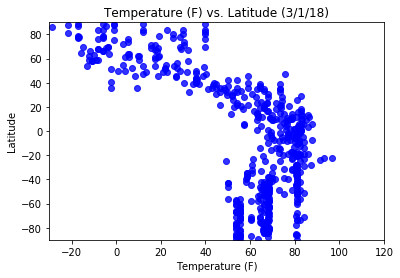

In [43]:
# scatter plot of Temperature (F) vs. Latitude
#plt.scatter(latlon_df["Temperature (F)"], latlon_df["Lat"], marker="o", facecolors="red", edgecolors="black")

sns.regplot(x=latlon_df["Temperature (F)"], y=latlon_df["Lat"], fit_reg=False, color="blue")

# setting axis limits
plt.ylim(-90,90)
plt.xlim(-30,120)

# creating labels
plt.title("Temperature (F) vs. Latitude (3/1/18)")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.savefig("Temp_Lat.png")
plt.show()



### Humidity (%) vs. Latitude ###

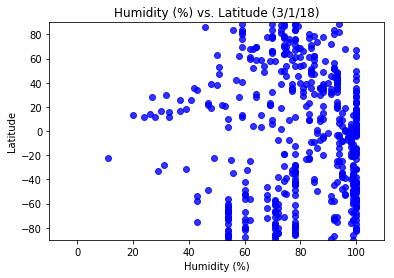

In [44]:
# scatter plot of Humidity (%) vs. Latitude
sns.regplot(x=latlon_df["Humidity (%)"], y=latlon_df["Lat"], fit_reg=False, color="blue")

# setting axis limits
plt.ylim(-90,90)
plt.xlim(-10,110)

# creating labels
plt.title("Humidity (%) vs. Latitude (3/1/18)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

plt.savefig("Hum_Lat.png")
plt.show()

### Cloudiness (%) vs. Latitude ###

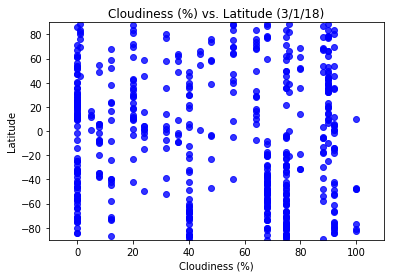

In [45]:
# scatter plot of Cloudiness (%) vs. Latitude
sns.regplot(x=latlon_df["Cloudiness (%)"], y=latlon_df["Lat"], fit_reg=False, color="blue")

# setting axis limits
plt.ylim(-90,90)
plt.xlim(-10,110)

# creating labels
plt.title("Cloudiness (%) vs. Latitude (3/1/18)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

plt.savefig("Cloud_Lat.png")
plt.show()

### Wind Speed (mph) vs. Latitude ###

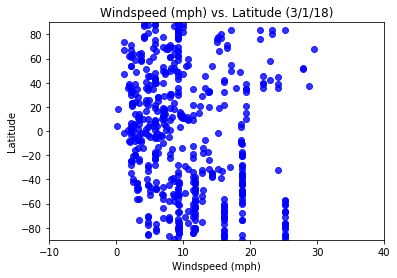

In [46]:
# scatter plot of Wind Speed (mph) vs. Latitude
sns.regplot(x=latlon_df["Windspeed (mph)"], y=latlon_df["Lat"], fit_reg=False, color="blue")

# setting axis limits
plt.ylim(-90,90)
plt.xlim(-10, 40)

# creating labels
plt.title("Windspeed (mph) vs. Latitude (3/1/18)")
plt.xlabel("Windspeed (mph)")
plt.ylabel("Latitude")

plt.savefig("Wind_Lat.png")
plt.show()

In [42]:
# export to csv
latlon_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)